# lab8
1. https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

2. https://docs.opencv.org/3.4/dc/d71/tutorial_py_optimization.html

3. https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
def snow_image(img):
    plt.figure(figsize=(8, 8))  # Опционально: задаём размер окна
    plt.imshow(img, cmap='gray')  # cmap='gray' для отображения в градациях серого
    plt.axis('off')  # Убираем оси для более чистого отображения
    plt.show()  # Отображаем изображение

def snow_image(title, img):
    plt.figure(figsize=(8, 8))  # Опционально: задаём размер окна
    plt.imshow(img, cmap='gray')  # cmap='gray' для отображения в градациях серого
    plt.title(title)  # Устанавливаем заголовок
    plt.axis('off')  # Убираем оси для более чистого отображения
    plt.show()  # Отображаем изображение
   

# pt1

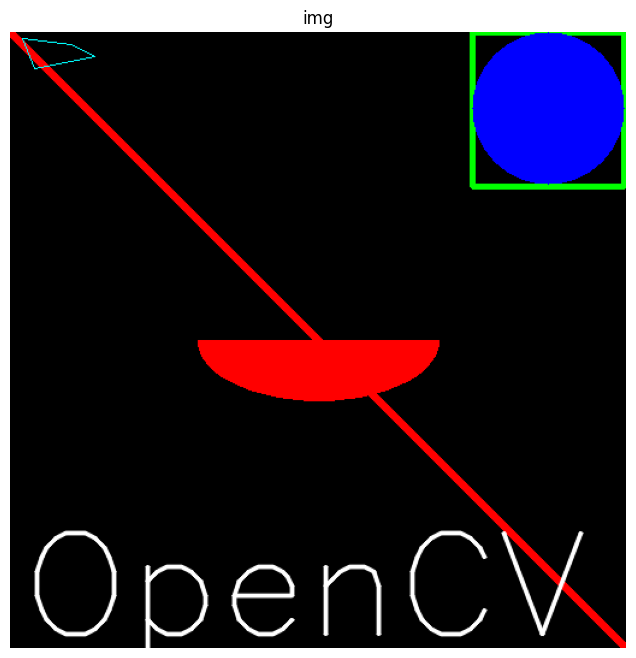

In [6]:

 
# Create a black image
img = np.zeros((512,512,3), np.uint8)
 
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv.circle(img,(447,63), 63, (0,0,255), -1)
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)


snow_image('img', img)

cv.waitKey()
cv.destroyAllWindows()

# pt2

In [9]:
e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()

In [11]:
img1 = cv.imread('resources/lab8/messi5.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print( t )

1.0573548


In [12]:
cv.useOptimized()
True

True

In [13]:
%timeit res = cv.medianBlur(img1,49)

47.2 ms ± 5.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
cv.setUseOptimized(False)


In [15]:
cv.useOptimized()
False


False

In [16]:
%timeit res = cv.medianBlur(img1,49)

50.6 ms ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
x = 5

In [18]:
%timeit y=x**2

40.6 ns ± 2.46 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [19]:
%timeit y=x*x

28.8 ns ± 1.4 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [20]:
z = np.uint8([5])

In [21]:
%timeit y=z*z

535 ns ± 63.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [22]:
%timeit y=np.square(z)

508 ns ± 40.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [23]:
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

In [24]:
%timeit z = cv.countNonZero(gray)

28.8 µs ± 4.48 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [25]:
%timeit z = np.count_nonzero(gray)

32 µs ± 4.99 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# pt3

In [4]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [5]:
import numpy as np
import cv2 as cv
 
cap = cv.VideoCapture('output.avi')
 
while cap.isOpened():
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


In [8]:
import numpy as np
import cv2 as cv
 
cap = cv.VideoCapture(0)
 
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
 
    # write the flipped frame
    out.write(frame)
 
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
 
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()